# Chapter 2: Iterated Function System (IFS)

Chapter 2 of the book [PL] <b>Fraktale i chaos</b> (eng.: "Fractals and Chaos") written by <i>Jacek Kudrewicz</i> is a basic description of a specific class of fractals. The example of the IFS is a spiral presented as the last example in the Chapter 1 notebook.

I want to honor authors of books, papers and code examples which are used by me during my learning. That's why every new notebook will start from the list of literature.

## Bibliography:

#### Base:
* <b>Fraktale i chaos</b> (eng.: "Fractals and Chaos") by <i>Jacek Kudrewicz</i>.

#### Additional:

* Affine Transformation - Wikipedia: https://en.wikipedia.org/wiki/Affine_transformation
* Contraction Mapping description and example - http://www.math.uconn.edu/~kconrad/blurbs/analysis/contraction.pdf
* Contraction Mapping Practical Considerations - https://en.wikipedia.org/wiki/Newton%27s_method#Practical_considerations
* Hausdorff distance for object mapping in image processing - http://cgm.cs.mcgill.ca/~godfried/teaching/cg-projects/98/normand/main.html

## 2.1 Christmas tree and other images

* Affine transformations:

- translation,
- scaling,
- homothety,
- similarity transformation,
- reflection,
- rotation,
- shear mapping,
- ... and combinations of them.

Mathematical description is given on the Wikipedia: https://en.wikipedia.org/wiki/Affine_transformation#Mathematical_definition
but the general formula is a simple linear function in the form:

$$ f(\bar{x}) = A\bar{x} + \bar{b} $$

where:
* $ A $ is a linear mapping matrix,
* $ \bar{b} $ is a translation vector.


#### but before I go with the topic...
I want to try program some transformations in Numpy to observe how this works in practice (by the way, I know many of these from my mechanics classes and from image processing but it is always good to repeat some things to understand it better).

In [1]:
# Import Python libraries
import random
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# Prepare data for transformations

def draw_circle(canvas, center_coordinates, radius):
    x = -radius
    y = 0
    err = 2 - 2 * radius
    
    while x < 0:
        first_quadrant_coord = [center_coordinates[0] - x,
                                center_coordinates[1] + y]
        second_quadrant_coord = [center_coordinates[0] - y,
                                center_coordinates[1] - x]
        third_quadrant_coord = [center_coordinates[0] + x,
                               center_coordinates[1] - y]
        fourth_quadrant_coord = [center_coordinates[0] + y,
                                center_coordinates[1] + x]
        coordinates = [first_quadrant_coord,
                      second_quadrant_coord,
                      third_quadrant_coord,
                      fourth_quadrant_coord]
        for coord in coordinates:
            if (coord[0] > 0) and (coord[1] > 0):
                try:
                    canvas[coord[1], coord[0]] = 255
                except IndexError:
                    pass
            else:
                pass
        radius = err
        if radius <= y:
            y = y + 1
            err = err + y * 2 + 1
        if (radius > x) or (err > y):
            x = x + 1
            err = err + x * 2 + 1
    return canvas
        

mtx = np.zeros(shape=(100, 80))

circ = draw_circle(mtx, [13, 80], 33)
circ = draw_circle(circ, [54, 55], 8)

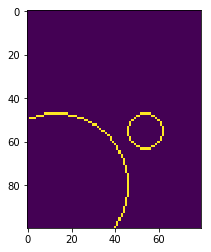

In [3]:
plt.imshow(circ)

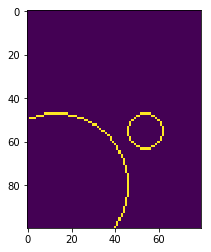

In [4]:
# Identity transformation = A * x

identity_matrix_A = np.eye(100)
output = np.matmul(identity_matrix_A, circ)

plt.imshow(output)

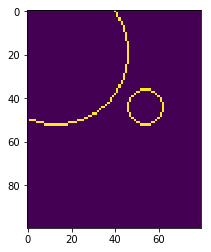

In [5]:
# Reflection (vertically)

output = np.flip(circ, 0)

plt.imshow(output)

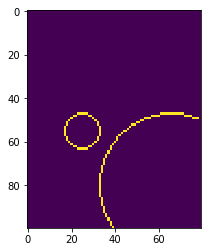

In [6]:
# Reflection (horizontally)

output = np.flip(circ, 1)

plt.imshow(output)

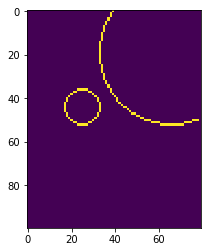

In [7]:
# Reflection (vertically and horizontally)

output_a = np.flip(circ, 0)
output_z = np.flip(output_a, 1)

plt.imshow(output_z)

(100, 140)

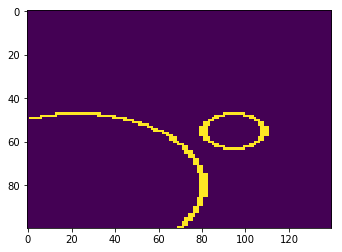

In [8]:
# Upscale (x-axis)

def calculate_value(step, unit_size, base_array, indexes):
    distances = np.array([-1, 0])
    value = step * unit_size
    output = 0
    if np.any(indexes == value):
        output = output + base_array[int(value)]
    else:
        idxs = indexes.astype(np.float)
        array = np.append(indexes, value)
        array = np.sort(array)
        for i in distances:
            try:
                # find the place of value in array
                value_index = np.where(array==value)
                
                # calculate weight
                weight = np.absolute((indexes[value_index + i][0][0] - value))
                
                # calculate value
                if weight != 0:
                    output = output + base_array[indexes[value_index + i]][0][0] * weight
                else:
                    output = output + base_array[indexes[value_index + i]][0][0]
                output = output
            except IndexError:
                output = output + 0
    return output

def interpolate_values(x_array, scale_factor):
    base_array_length = np.shape(x_array)[0]
    base_array_indexes = np.arange(0, base_array_length)
    upscaled_array_length = int(base_array_length * scale_factor + base_array_length)
    upscaled_array_values = np.zeros(shape=(1, upscaled_array_length))
    step_size = base_array_length / upscaled_array_length
    for idx, i in enumerate(upscaled_array_values[0]):
        upscaled_array_values[:, idx] = calculate_value(idx, step_size, x_array, base_array_indexes)
    return upscaled_array_values[0]
        
        
upscaled_array = []
for i in range(0, np.shape(circ)[0]):
    z = interpolate_values(circ[i, :], 0.75)
    z[z > 0] = 255
    upscaled_array.append(z)

plt.imshow(upscaled_array)
np.shape(upscaled_array)

### Base equations

$$\begin{eqnarray}
x' = a_{11}x + a_{12}y + c_{1} \\
y' = a_{21}x + a_{22}y + c_{2} \\
\end{eqnarray}$$

Example values:

No. | $ a_{11} $ | $ a_{12} $ | $ a_{21} $ | $ a_{22} $ | $ c_{1} $ | $ c_{2} $ |
--- | ---------- | ---------- | ---------- | ---------- | --------- | --------- |
1 | -0.67 | -0.02 | -0.18 | 0.81 | 0.00 | 1.02 |
2 | 0.40 | 0.40 | -0.10 | 0.40 | -0.04 | 0.06 |
3 | -0.40 | -0.40 | -0.10 | 0.40 | 0.04 | 0.06 |
4 | -0.10 | 0.00 | 0.44 | 0.44 | 0.00 | -0.14 |

In [9]:
def prepare_christmas_tree(iterations=1000000):
    choices = [1, 2, 3, 4]
    parameters = {
        1: [-0.67, -0.02, -0.18, 0.81, 0.00, 1.02],
        2: [0.40, 0.40, -0.10, 0.40, -0.04, 0.06],
        3: [-0.40, -0.40, -0.10, 0.40, 0.04, 0.06],
        4: [-0.10, 0.00, 0.44, 0.44, 0.00, -0.14]
    }
    start_point = [np.random.rand(), np.random.rand()]
    points = [start_point]
    for i in range(0, iterations):
        no = random.choice(choices)
        x = points[-1][0] * parameters[no][0] + points[-1][1] * parameters[no][1] + parameters[no][4]
        y = points[-1][0] * parameters[no][2] + points[-1][1] * parameters[no][3] + parameters[no][5]
        points.append([x, y])
    return np.asarray(points)

In [10]:
my_tree = prepare_christmas_tree()

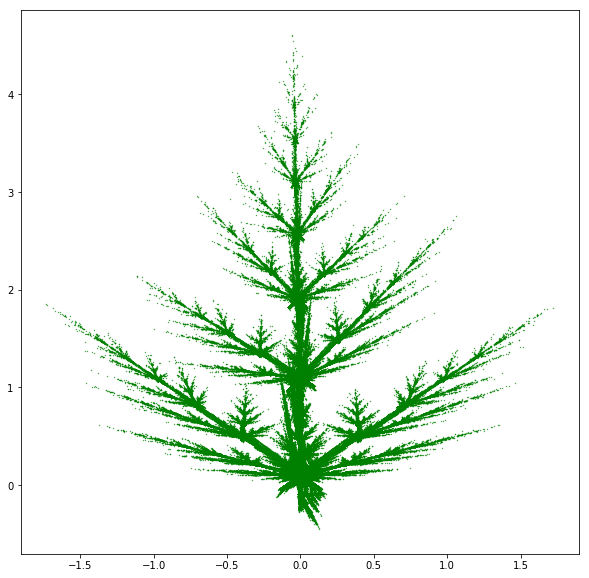

In [11]:
plt.figure(figsize=(10,10))
plt.scatter(my_tree[:, 0], my_tree[:, 1], s=0.1, c='g')

### Contraction mapping

http://www.math.uconn.edu/~kconrad/blurbs/analysis/contraction.pdf

In [12]:
def find_square_root(value, number_of_iterations):
    print('You are looking for the square root of:', value)
    last_val = 10
    for i in range(number_of_iterations):
        new_val = 0.5 * (last_val + value/last_val)
        if (new_val == last_val):
            break
        else:
            print('Iteration:', i)
            last_val = new_val
            print(last_val)
    return new_val

In [13]:
for i in range(0, 2):
    find_square_root(i, 10)
    print('\n')

You are looking for the square root of: 0
Iteration: 0
5.0
Iteration: 1
2.5
Iteration: 2
1.25
Iteration: 3
0.625
Iteration: 4
0.3125
Iteration: 5
0.15625
Iteration: 6
0.078125
Iteration: 7
0.0390625
Iteration: 8
0.01953125
Iteration: 9
0.009765625


You are looking for the square root of: 1
Iteration: 0
5.05
Iteration: 1
2.624009900990099
Iteration: 2
1.5025530119986812
Iteration: 3
1.0840434673026924
Iteration: 4
1.0032578510960606
Iteration: 5
1.0000052895642693
Iteration: 6
1.0000000000139897
Iteration: 7
1.0




In [14]:
def find_log(value, logarithm_base, number_of_iterations):
    if value==0:
        raise ValueError('Value cannot be zero!')
    print('You are looking for the logarithm of base {} of {}.'.format(logarithm_base,
                                                                      value))
    last_val = 10
    base_log = np.log(logarithm_base)
    for i in range(number_of_iterations):
        new_val = last_val - ((logarithm_base**last_val - value) / (logarithm_base**last_val * base_log))
        if (new_val == last_val):
            break
        else:
            last_val = new_val
    print(new_val)
    return new_val

In [15]:
for i in range(1, 4):
    find_log(i, 2, 100)
    print('\n')
find_log(0.4, 2, 100)

You are looking for the logarithm of base 2 of 1.
3.4860243383e-17


You are looking for the logarithm of base 2 of 2.
1.0


You are looking for the logarithm of base 2 of 3.
1.58496250072


You are looking for the logarithm of base 2 of 0.4.
-1.32192809489


-1.3219280948873622

-> This method is not good for the logarithms. More in the Wikipedia article: https://en.wikipedia.org/wiki/Newton%27s_method#Practical_considerations

### Hausdorff metrics



Example 1.3 from the Chapter 1 shows Sierpinski's carpet:

In [16]:
class SierpinskiCarpet:
    
    def __init__(self, number_of_iterations=3):
        # Calculate size of np.array
        self.steps = number_of_iterations
        self.size = 3**number_of_iterations
        self.canvas = []
        
    def create_canvas(self):
        self.canvas = np.ones((self.size, self.size), dtype=int)
    
    def show_canvas(self):
        fig = plt.figure(figsize=(10,10))
        plt.imshow(self.canvas, cmap='gray')
        plt.show()
        
    @staticmethod
    def find_satellite_points(point, distance):
        # find new distance and store it
        if distance == 1:
            new_distance = 0
        else:
            new_distance = int((3**(distance-1)) / 2)
        
        # find all satellite points
        d = 3**distance
        list_of_points = []
        for p in point:
            pA = [p[0] - d, p[0], p[0] + d]
            pB = [p[1] - d, p[1], p[1] + d]
            for x in pA:
                for y in pB:
                    if [x, y] != [p[0], p[1]]:
                        list_of_points.append([x, y])
        list_of_points.append(new_distance)
        return list_of_points
    
    @staticmethod
    def prepare_neighbours(pts, dist):
        full_array = []
        for p in pts:
            for i in range(p[0] - dist, p[0] + dist + 1):
                for j in range(p[1] - dist, p[1] + dist + 1):
                    full_array.append([i, j])
        return full_array
        
    def prepare_points(self):
        # The idea behind algorithm is explained after the code - it will be not clear if I write it here
        i = self.steps
        
        # Define first point
        middle = int(np.ceil(self.size/2))
        first_point = [middle, middle]
        first_n_distance = int((3**(i-1)) / 2)
        points = {i: [first_point, first_n_distance]}
        
        # Define the rest of points
        x = points[i]
        i = i - 1
        while i > 0:
            x = self.find_satellite_points(x[:-1], i)
            points[i] = x
            i = i - 1
        return points
        
    def fill_matrix(self, points_dict):
        for key in points_dict:
            array_of_vals = points_dict[key][:-1]
            neighbours = points_dict[key][-1]
            if neighbours > 0:
                array_of_vals = self.prepare_neighbours(array_of_vals, neighbours)
            for val in array_of_vals:
                self.canvas[val[0]-1, val[1]-1] = 0
        
    def create_carpet(self):
        # The first part is to prepare dict with points to fill
        filled_points = self.prepare_points()
        # The second part is to fill matrix of ones by zeros
        self.fill_matrix(filled_points)
        return filled_points

In [17]:
my_carpet = SierpinskiCarpet(6)
my_carpet.create_canvas()
f = my_carpet.create_carpet()

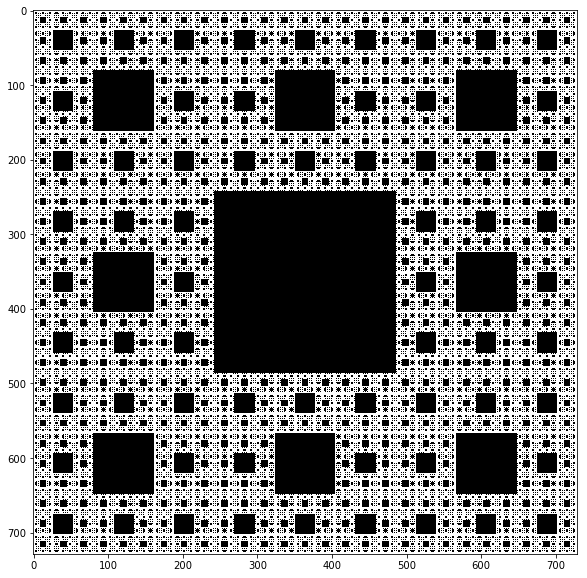

In [18]:
my_carpet.show_canvas()

It is an example of the set described by the Hausdorff metric. Very intersting is usage of Hausdorff distance in image processing (object matching): http://cgm.cs.mcgill.ca/~godfried/teaching/cg-projects/98/normand/main.html. Many known fractals may be described by this metric.

Sierpinski Carpet has his limit inside this metric beacuse each new square is inside the base square at the equal distance to his "parent" edges. The same is true for the Sierpinsky Triangle:

In [19]:
class SierpinskiTraingle:
    
    def __init__(self, triangle_edge_length=100):
        self.base_length = triangle_edge_length
        self.base_points = self.calc_base([0, 0], triangle_edge_length)
        self.edge_points = []
        self.inner_triangles = []
        
    def calc_base(self, pt_a, length):
        pt_b = [pt_a[0] + length, pt_a[1]]
        pt_c = [(pt_a[0] + length) / 2, (pt_a[1] + 0.866 * length)]
        return [pt_a, pt_b, pt_c]
    
    @staticmethod
    def calc_values(points):
        bl = points[0]
        br = points[1]
        u = points[2]
        
        upper_left_x = bl[0] + (br[0] - bl[0]) * 0.25
        upper_left_y = bl[1] + 0.866 * (br[0] - bl[0]) * 0.5
        upper_left = [upper_left_x, upper_left_y]
            
        bottom_middle_x = bl[0] + (br[0] - bl[0]) * 0.5
        bottom_middle_y = bl[1]
        bottom_middle = [bottom_middle_x, bottom_middle_y]
            
        upper_right_x = bl[0] + (br[0] - bl[0]) * 0.75
        upper_right_y = upper_left_y
        upper_right = [upper_right_x, upper_right_y]
        return ([upper_left, bottom_middle, upper_right],
                [bl, bottom_middle, upper_left],
                [bottom_middle, br, upper_right],
                [upper_left, upper_right, u])

    def calc_inner_triangle(self):
        if len(self.edge_points) == 0:
            a = self.base_points[0]
            b = self.base_points[1]
            
            upper_left_x = (b[0] - a[0]) * 0.25
            upper_left_y = 0.866 * (b[0] - a[0]) * 0.5
            upper_left = [upper_left_x, upper_left_y]
            
            bottom_middle_x = (b[0] - a[0]) * 0.5
            bottom_middle_y = a[1]
            bottom_middle = [bottom_middle_x, bottom_middle_y]
            
            upper_right_x = (b[0] - a[0]) * 0.75
            upper_right_y = upper_left_y
            upper_right = [upper_right_x, upper_right_y]
            self.edge_points.append([upper_left, bottom_middle, upper_right])
            self.inner_triangles.append([[self.base_points[0], bottom_middle, upper_left],
                                         [bottom_middle, self.base_points[1], upper_right],
                                         [upper_left, upper_right, self.base_points[2]]])
            self.print_info()
        else:
            # Last level triangles
            last_level = self.inner_triangles[-1]
            new_level = []
            for i in last_level:
                x = self.calc_values(i)
                self.edge_points.append(x[0])
                new_level.append(x[1])
                new_level.append(x[2])
                new_level.append(x[3])
            self.inner_triangles.append(new_level)
            self.print_info()
                                         

    def show_triangle(self):
        fig = plt.figure(figsize=(6,6))
        # plot base
        plt.plot([self.base_points[0][0], self.base_points[1][0]],
                [self.base_points[0][1], self.base_points[1][1]], color='red')
        plt.plot([self.base_points[1][0], self.base_points[2][0]],
                [self.base_points[1][1], self.base_points[2][1]], color='red')
        plt.plot([self.base_points[0][0], self.base_points[2][0]],
                [self.base_points[0][1], self.base_points[2][1]], color='red')
        # plot smaller edges
        if len(self.edge_points) > 0:
            for record in self.edge_points:
                upper_left = record[0]
                bottom_middle = record[1]
                upper_right = record[2]
                # upper left and bottom middle
                plt.plot([upper_left[0], bottom_middle[0]], [upper_left[1], bottom_middle[1]],
                        color='blue')
                # upper left and upper right
                plt.plot([upper_left[0], upper_right[0]], [upper_left[1], upper_right[1]],
                        color='blue')
                # bottom middle and upper right
                plt.plot([bottom_middle[0], upper_right[0]], [bottom_middle[1], upper_right[1]],
                        color='blue')
        plt.show()
        
    def print_info(self):
        triangles = 'You generated {} triangles'.format(len(self.edge_points))
        depth = 'You are at the level {}'.format(len(self.inner_triangles))
        print(triangles)
        print(depth)
        print("")

In [20]:
st = SierpinskiTraingle(triangle_edge_length=10)

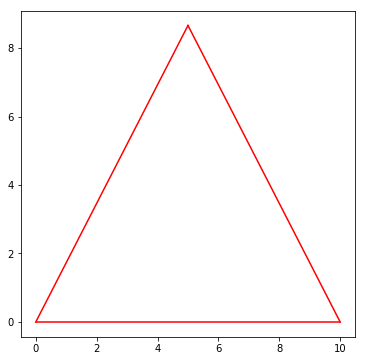

In [21]:
st.show_triangle()

In [22]:
st.calc_inner_triangle()

You generated 1 triangles
You are at the level 1



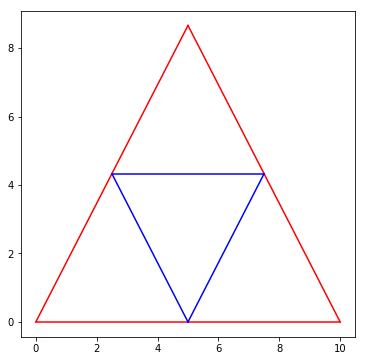

In [23]:
st.show_triangle()

In [24]:
st.calc_inner_triangle()

You generated 4 triangles
You are at the level 2



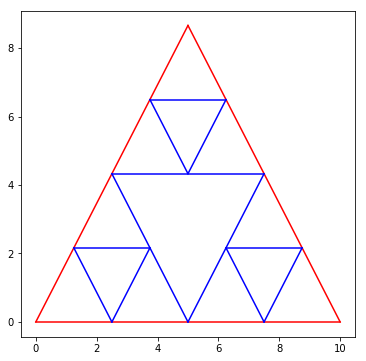

In [25]:
st.show_triangle()

You generated 13 triangles
You are at the level 3



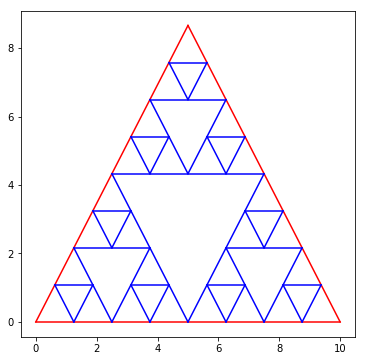

In [26]:
st.calc_inner_triangle()
st.show_triangle()

You generated 40 triangles
You are at the level 4



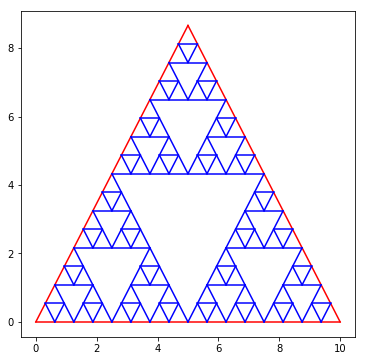

In [27]:
st.calc_inner_triangle()
st.show_triangle()

You generated 121 triangles
You are at the level 5



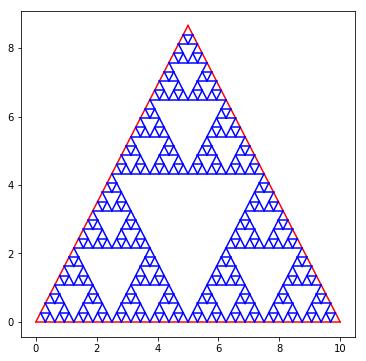

In [28]:
st.calc_inner_triangle()
st.show_triangle()

You generated 364 triangles
You are at the level 6



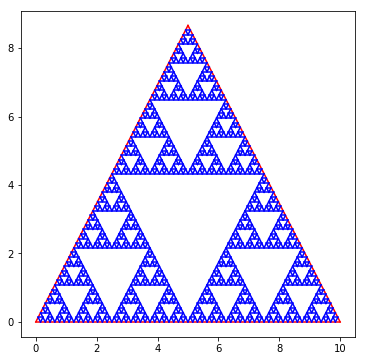

In [29]:
st.calc_inner_triangle()
st.show_triangle()

## IFS examples from parametric equations

### Example 2.1: IFS described by three functions:

$$\begin{equation}
w_{1}(z) = \frac{z}{2} \\
w_{2}(z) = \frac{z + 1}{2} \\
w_{3}(z) = \frac{2z + 1 + i \sqrt(3)}{4} \\
\end{equation}$$

where:

$$\begin{equation}
z = x + iy
\end{equation}$$

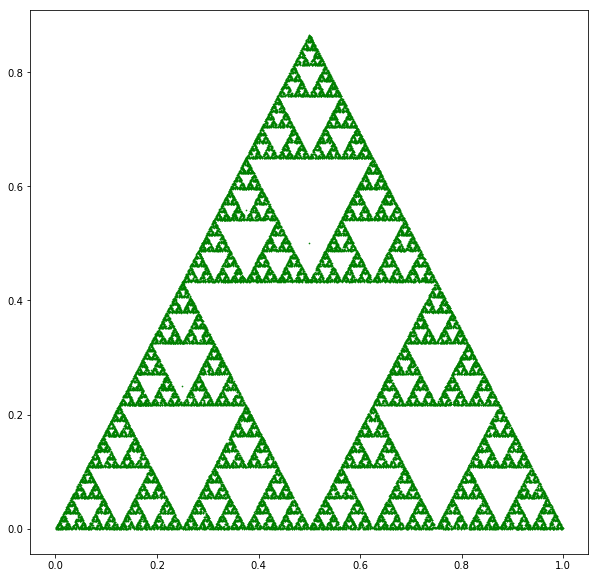

In [39]:
def run_example_2_1(x, y, iterations):
    # Random point allocation
    z = complex(x, y)
    points_list = [[x, y]]
    for i in range(0, iterations):
        test = np.random.choice(['w1', 'w2', 'w3'])
        if test == 'w1':
            z = z / 2
        elif test == 'w2':
            z = (z + 1) / 2
        else:
            z = (2 * z + 1 + 1j * np.sqrt(3)) / 4
        points_list.append([z.real, z.imag])
    return np.asarray(points_list)

example21 = run_example_2_1(0.5, 0.5, 50000)
plt.figure(figsize=(10,10))
plt.scatter(example21[:, 0], example21[:, 1], s=0.4, c='g')

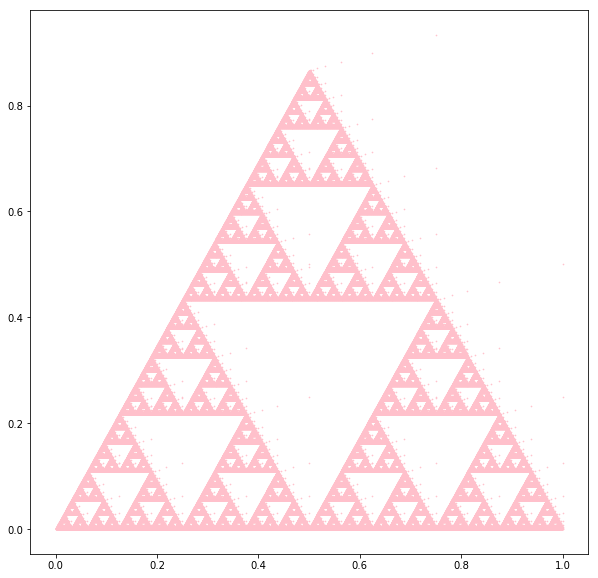

In [31]:
def calculate_z(p):
    z = complex(p[0], p[1])
    z1 = z / 2
    z2 = (z + 1) / 2
    z3 = (2 * z + 1 + 1j * np.sqrt(3)) / 4
    return [[z1.real, z1.imag], [z2.real, z2.imag], [z3.real, z3.imag]]

def run_example_2_1_all(x, y, iterations):
    z = complex(x, y)
    points_list = []
    z1 = z / 2
    z2 = (z + 1) / 2
    z3 = (2 * z + 1 + 1j * np.sqrt(3)) / 4
    points_list.append([[z1.real, z1.imag], [z2.real, z2.imag], [z3.real, z3.imag]])
    
    for i in range(0, iterations):
        new_set_of_points = []
        for record in points_list[-1]:
            zzz = calculate_z(record)
            new_set_of_points.append(zzz[0])
            new_set_of_points.append(zzz[1])
            new_set_of_points.append(zzz[2])
        points_list.append(new_set_of_points)
        
    new_array = []
    for dim in points_list:
        for rec in dim:
            new_array.append(rec)

    return np.asarray(new_array)

example21 = run_example_2_1_all(1, 1, 10)
plt.figure(figsize=(10,10))
plt.scatter(example21[:, 0], example21[:, 1], s=0.4, c='pink')

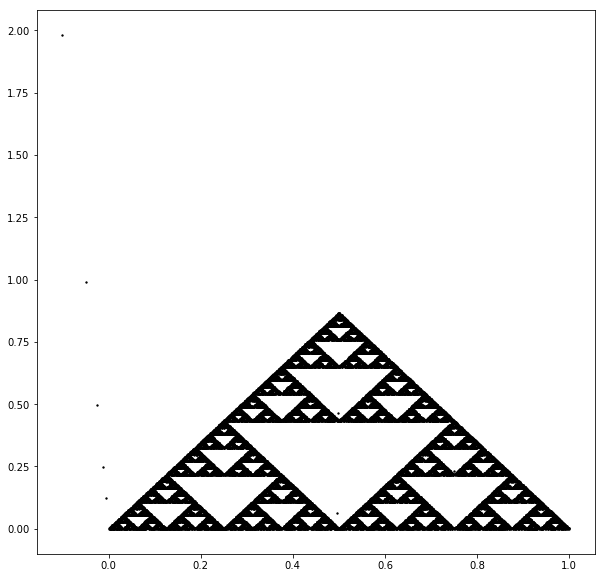

In [54]:
def run_example_2_1(x, y, iterations):
    # Random point allocation
    z = complex(x, y)
    points_list = [[x, y]]
    for i in range(0, iterations):
        test = np.random.choice(['w1', 'w2', 'w3'])
        if test == 'w1':
            z = z / 2
        elif test == 'w2':
            z = (z + 1) / 2
        else:
            z = (2 * z + 1 + 1j * np.sqrt(3)) / 4
        points_list.append([z.real, z.imag])
    return np.asarray(points_list)

example21 = run_example_2_1(-0.1, 1.98, 50000)
plt.figure(figsize=(10,10))
plt.scatter(example21[:, 0], example21[:, 1], s=1.8, c='black')

### Example 2.2: IFS described by two functions - spiral:

$$\begin{equation}
w_{1}(z) = -0.4z - (1 - 0.1i) \\
w_{2}(z) = (0.76 + 0.4i)*z \\
\end{equation}$$

where:

$$\begin{equation}
z = x + iy
\end{equation}$$

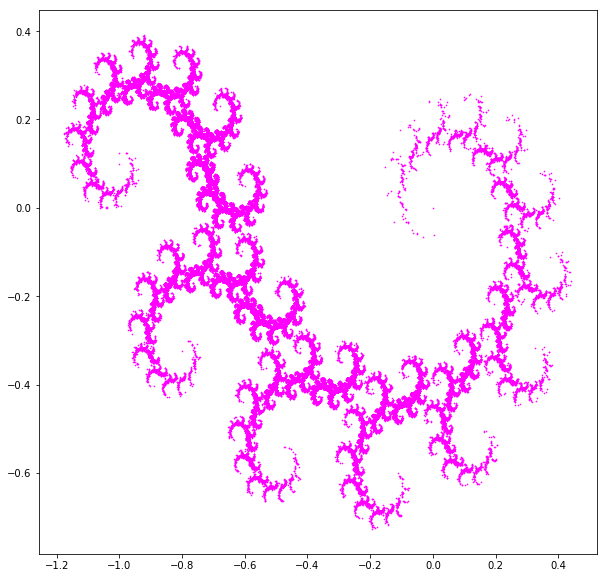

In [40]:
def run_example_2_2(x, y, iterations):
    # Random point allocation
    z = complex(x, y)
    points_list = [[x, y]]
    for i in range(0, iterations):
        test = np.random.choice(['w1', 'w2'])
        if test == 'w1':
            z = -0.4 * z - (1 -0.1j)
        else:
            z = (0.76 + 0.4j) * z
        points_list.append([z.real, z.imag])
    return np.asarray(points_list)

example22 = run_example_2_2(0, 0, 500000)
plt.figure(figsize=(10,10))
plt.scatter(example22[:, 0], example22[:, 1], s=0.4, c='magenta')

### Example 2.3: IFS described by two functions - line:

$$\begin{equation}
w_{1}(x) = \frac{x}{3} \\
w_{2}(x) = \frac{x + 2}{3} \\
\end{equation}$$

where:

$$\begin{equation}
0 <= x <= 1
\end{equation}$$

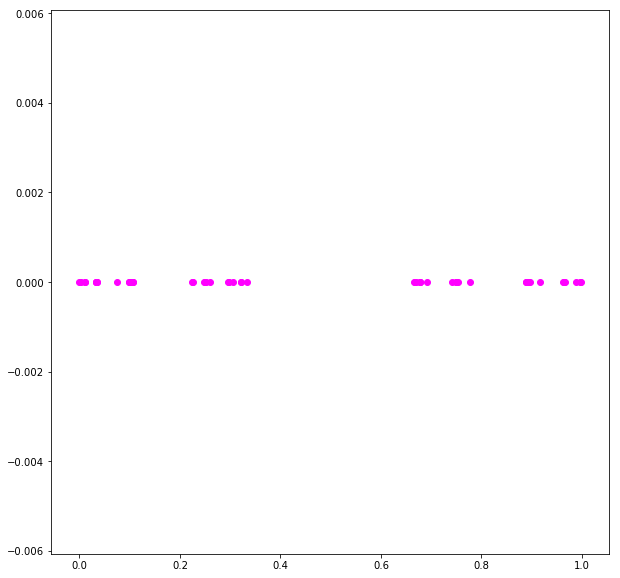

In [48]:
def run_example_2_3(x, iterations):
    # Random point allocation
    points_list = [[x, 0]]
    for i in range(0, iterations):
        test = np.random.choice(['w1', 'w2'])
        if test == 'w1':
            x = x / 3
        else:
            x = (x + 2) / 3
        points_list.append([x, 0])
    return np.asarray(points_list)

example23 = run_example_2_3(0, 50)
plt.figure(figsize=(10,10))
plt.scatter(example23[:, 0], example23[:, 1], c='magenta')

#### Summary:

In this chapter I've learned about Iterated Function Systems and the Hausdorff metrics.

* Hausdorff metrics describes fractals.
* IFS evolves into attractor  - as example it could be seen with example 2.1 the last traingle (where points are moving from the initial position into the triangle).
* Memory management is very painful when the fractal points are stored in arrays. (Depth limit).
* Contraction mapping is a method for generating fractals but it could be used to find square root of a number. It is not so well suited for the logarithms :)

> The next chapter (3) will be covered in the new notebook. And it covers Probabilistic IFS algorithms. They are used to generate fractals and save memory.

-----

<i>Things to correct in this notebook</i>:
- Actually nothing :)